In [1]:
import os
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygeostat as gs

print("pygeostat version:", gs.__version__)

pygeostat version: 1.1.0


In [2]:
# import Outlier class from outlier.py
from outlier import Outlier

In [3]:
example = "ex1"
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures")
os.makedirs(IMAGES_PATH, exist_ok=True)


def savefig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load Data

In [4]:
comps = gs.DataFile(data=pd.read_csv("./composites.csv"), x="x", y="y", z="z")
comps.data = comps.data.dropna()
comps["length"] = comps["to"] - comps["from"]
comps.head()

,dh,from,to,x,y,z,startx,starty,startz,endx,endy,endz,Au,length
0,1.0,0.0,5.0,1276.912,1464.808,1297.906,1278.369,1464.393,1299.895,1275.456,1465.223,1295.917,0.005,5.0
1,1.0,5.0,10.0,1274.002,1465.637,1293.926,1275.456,1465.223,1295.917,1272.547,1466.051,1291.935,0.006,5.0
2,1.0,10.0,15.0,1271.094,1466.466,1289.944,1272.547,1466.051,1291.935,1269.640,1466.881,1287.953,0.005,5.0
3,1.0,15.0,20.0,1268.187,1467.296,1285.961,1269.640,1466.881,1287.953,1266.734,1467.713,1283.970,0.005,5.0
4,1.0,20.0,25.0,1265.281,1468.128,1281.979,1266.734,1467.713,1283.970,1263.827,1468.542,1279.987,0.005,5.0


In [5]:
comps.write_file("composites.dat")

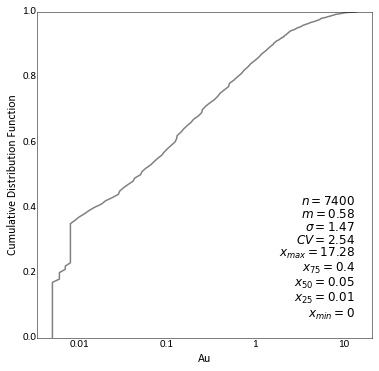

In [6]:
gs.histogram_plot(comps, "Au", icdf=1, logx=True, figsize=(6, 6))

Saving figure outlier_ex1_drillplot


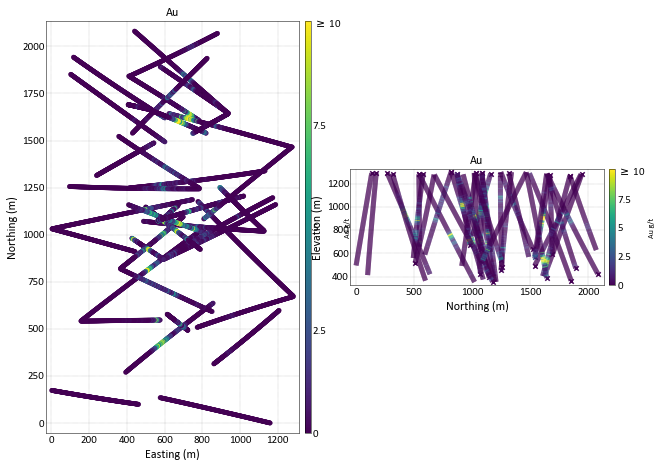

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
gs.location_plot(
    comps,
    var="Au",
    orient="xy",
    vlim=(0, 10),
    ax=ax[0],
    cbar_label="Au g/t",
    grid=True,
)
gs.location_plot(
    comps,
    var="Au",
    orient="yz",
    vlim=(0, 10),
    ax=ax[1],
    cbar_label="Au g/t",
    grid=True,
)
savefig(f"outlier_{example}_drillplot", tight_layout=False)

# Decluster

In [8]:
declus = gs.Program("declus", getpar=True)

D:\03 UofA\04 Research\02 PhD\Code\Outlier Class\tmp5n3o9mm2/declus.par has been copied to the clipboard


In [9]:
parstr = """                  Parameters for DECLUS
                  *********************

START OF PARAMETERS:
composites.dat         -file with data
4   5   6   13               -  columns for X, Y, Z, and variable
-998     1.0e21          -  trimming limits
declus.sum                  -file for summary output
declus.out                  -file for output with data & weights
1.0   1.0                   -Y and Z cell anisotropy (Ysize=size*Yanis)
0                           -0=look for minimum declustered mean (1=max)
25  50  750               -number of cell sizes, min size, max size
50                           -number of origin offsets
"""
declus.run(parstr=parstr, liveoutput=False)

Calling:  ['declus', 'temp']


In [10]:
sum_fl = gs.DataFile("declus.sum")

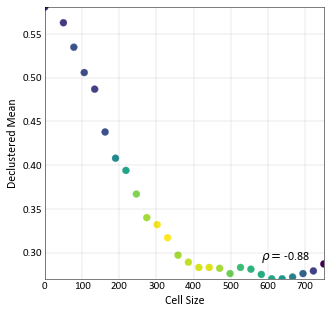

In [11]:
gs.scatter_plot(
    sum_fl["Cell Size"], sum_fl["Declustered Mean"], grid=True, figsize=(5, 5)
)

In [12]:
parstr = """                  Parameters for DECLUS
                  *********************

START OF PARAMETERS:
composites.dat         -file with data
4   5   6   13               -  columns for X, Y, Z, and variable
-998     1.0e21          -  trimming limits
declus.sum                  -file for summary output
declus.out                  -file for output with data & weights
1.0   1.0                   -Y and Z cell anisotropy (Ysize=size*Yanis)
0                           -0=look for minimum declustered mean (1=max)
1  425  425               -number of cell sizes, min size, max size
50                          -number of origin offsets
"""
declus.run(parstr=parstr, liveoutput=False)

Calling:  ['declus', 'temp']


In [13]:
comps = gs.DataFile("declus.out").data.rename(
    columns={"Declustering Weight": "wts"}
)
comps.describe()

,dh,from,to,x,y,z,startx,starty,startz,endx,endy,endz,Au,length,wts
count,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.0,7400.000000
mean,19.909730,485.574324,490.574324,663.478155,1134.045359,879.370776,663.363169,1133.855503,881.483094,663.593130,1134.235239,877.258478,0.580966,5.0,1.000000
std,11.375799,295.634181,295.634181,270.582918,479.107694,243.468044,270.911308,479.123684,243.479722,270.259106,479.092443,243.456483,1.473493,0.0,1.034019
min,1.000000,0.000000,5.000000,1.531000,0.947000,352.331000,0.365000,1.286000,354.380000,2.696000,0.608000,350.283000,0.005000,5.0,0.201694
25%,10.000000,235.000000,240.000000,479.905500,886.402500,683.602500,479.840000,885.520250,685.715500,480.386000,887.263500,681.435000,0.008000,5.0,0.381827
50%,20.000000,470.000000,475.000000,651.450500,1109.639500,886.353000,651.208500,1109.341500,888.354000,651.498000,1110.022000,884.215500,0.050000,5.0,0.646501
75%,30.000000,715.000000,720.000000,852.895250,1559.272500,1087.115750,853.022750,1559.266500,1089.171250,852.950500,1559.053000,1085.102750,0.399250,5.0,1.214114
max,39.000000,1220.000000,1225.000000,1283.479000,2080.597000,1299.237000,1284.814000,2079.551000,1301.252000,1282.144000,2081.644000,1297.298000,17.285000,5.0,13.578345


In [14]:
test = comps[["Au", "length", "wts"]].copy()
desc = test.describe()

In [15]:
desc.loc["mean"]["Au"]

0.5809655405405371

In [16]:
def wtd_mean(var, wts):
    """weighted mean"""
    return np.average(var, weights=wts)


def wtd_var(var, wts):
    """weighted variance"""
    return np.average((var - wtd_mean(var, wts)) ** 2, weights=wts)


def weighted_describe(df, vars, wts):
    """weighted describe"""
    desc = df.describe()
    for var in vars:
        desc.loc["mean"][var] = wtd_mean(df[var], df[wts])
        desc.loc["std"][var] = np.sqrt(wtd_var(df[var], df[wts]))
    return desc

In [17]:
weighted_describe(test, ["Au"], "wts")

,Au,length,wts
count,7400.000000,7400.0,7400.000000
mean,0.282764,5.0,1.000000
std,1.020725,0.0,1.034019
min,0.005000,5.0,0.201694
25%,0.008000,5.0,0.381827
50%,0.050000,5.0,0.646501
75%,0.399250,5.0,1.214114
max,17.285000,5.0,13.578345


In [18]:
desc

,Au,length,wts
count,7400.000000,7400.0,7400.000000
mean,0.580966,5.0,1.000000
std,1.473493,0.0,1.034019
min,0.005000,5.0,0.201694
25%,0.008000,5.0,0.381827
50%,0.050000,5.0,0.646501
75%,0.399250,5.0,1.214114
max,17.285000,5.0,13.578345


# Despike

In [19]:
despike = gs.Program("despike_2000", getpar=True)

D:\03 UofA\04 Research\02 PhD\Code\Outlier Class\tmp7ez2ny94/despike_2000.par has been copied to the clipboard


In [20]:
parstr = """                  Parameters for Despike_2000
                  ***************************

START OF PARAMETERS:
declus.out                   -file with data
4 5 6  13  0                -columns for X, Y, Z, Var, and rock type
0  0  0                      -number valid RTs and their integer codes
-998   1.0e21             -trimming limits
10                           -number of NN for local average
0.5                          -Weight W1 for random component (between [0-1])
69069                        -Random Seed
despike.out                  -file for output
"""
despike.run(parstr, liveoutput=False)

Calling:  ['despike_2000', 'temp']


In [21]:
comps = gs.DataFile("despike.out").data.rename(
    columns={"Declustering Weight": "wts"}
)
comps.head()

,dh,from,to,x,y,z,startx,starty,startz,endx,endy,endz,Au,length,wts,DS-Au
0,1.0,0.0,5.0,1276.912,1464.808,1297.906,1278.369,1464.393,1299.895,1275.456,1465.223,1295.917,0.005,5.0,6.347167,0.005561
1,1.0,5.0,10.0,1274.002,1465.637,1293.926,1275.456,1465.223,1295.917,1272.547,1466.051,1291.935,0.006,5.0,3.104853,0.006183
2,1.0,10.0,15.0,1271.094,1466.466,1289.944,1272.547,1466.051,1291.935,1269.640,1466.881,1287.953,0.005,5.0,3.104853,0.005471
3,1.0,15.0,20.0,1268.187,1467.296,1285.961,1269.640,1466.881,1287.953,1266.734,1467.713,1283.970,0.005,5.0,2.639225,0.005527
4,1.0,20.0,25.0,1265.281,1468.128,1281.979,1266.734,1467.713,1283.970,1263.827,1468.542,1279.987,0.005,5.0,2.252115,0.005555


Saving figure outlier_ex1_declus_cdf


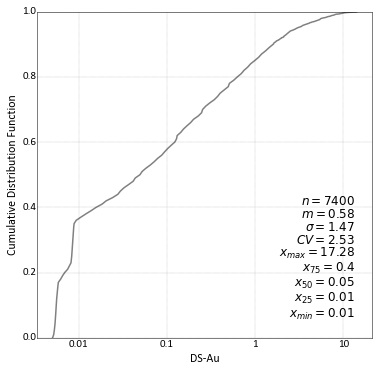

In [22]:
gs.histogram_plot(comps, "DS-Au", icdf=1, logx=True, figsize=(6, 6), grid=True)
savefig(f"outlier_{example}_declus_cdf", tight_layout=False)

# Initilaize Outlier Class

In [23]:
var = "DS-Au"
length = "length"
wts = "wts"
outlier = Outlier(data=comps, x="x", y="y", z="z", wts=wts, length=length)

# Probability Plots

- Cummulative probability plots with the option to set a threshold and flag samples
- Option to display Tukey's Fences

Saving figure outlier_ex1_cpp


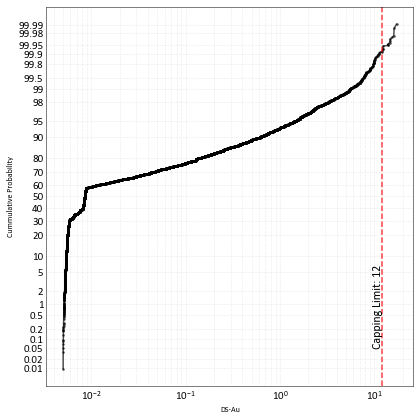

In [24]:
fig, ax = outlier.probplot(
    var, wts=wts, thresh=12, tukeys_fences=False, logx=True, figsize=(6, 6),
)
savefig(f"outlier_{example}_cpp")

Saving figure outlier_ex1_cpp_tukey


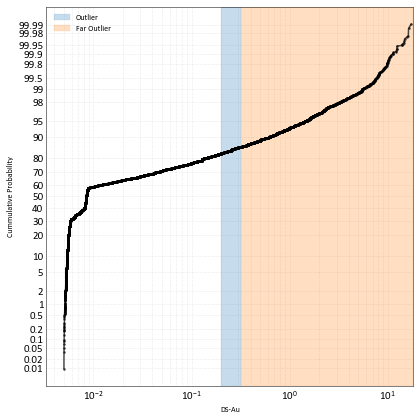

In [25]:
# with Tukey's Fences
fig, ax = outlier.probplot(
    var, wts=wts, thresh=None, tukeys_fences=True, logx=True, figsize=(6, 6),
)
savefig(f"outlier_{example}_cpp_tukey")

# Decile Analysis

- Decile analysis after Parrish (1997): "Geologist's Gordian Knot - To Cut Or Not To Cut"
- General recommendations are to check if:
    - The upper decile contains more than 40% of the total metal
    - The upper decile contains more than 2x the total metal of the previous decile
    - The upper percentile contains more than 10% of the total metal
- All decile and percentile statistics are weighted by assay length
- The lower threshold can be used to remove samples, for example samples at detection limit

In [26]:
decile = outlier.parrish_table(var, length, lower_thresh=0.015)
display(decile)

The upper decile contains more than 40% of the total metal: capping is recommended

The upper decile contains more than 2x the total metal of the previous decile: capping is recommended

The upper percentile contains more than 10% of the total metal (weighted by count): capping is recommended



,count,mean,std,min,25%,50%,75%,max,Metal,% Total
Decile,,,,,,,,,,
0,448,0.02,0.01,0.02,0.02,0.02,0.03,0.03,51.2,0.2
1,448,0.04,0.01,0.03,0.04,0.04,0.05,0.06,96.7,0.5
2,448,0.08,0.01,0.06,0.07,0.08,0.09,0.10,172.5,0.8
3,448,0.12,0.01,0.10,0.11,0.13,0.13,0.15,279.6,1.3
4,448,0.20,0.03,0.15,0.17,0.20,0.23,0.25,452.1,2.1
5,448,0.34,0.06,0.25,0.28,0.34,0.38,0.44,751.8,3.5
6,448,0.58,0.09,0.44,0.50,0.57,0.65,0.75,"1,294.0",6.0
7,448,0.99,0.16,0.75,0.87,0.98,1.12,1.31,"2,222.2",10.4
8,448,1.83,0.35,1.31,1.52,1.74,2.13,2.51,"4,095.5",19.1


- export table to csv

In [27]:
decile.data.to_csv(f"./parrish_decile_{example}.csv")

- export table to latex

In [28]:
formats = ["{:,.0f}", *("{:.2f} " * 7).split(" ")[:-1], "{:,.1f}", "{:.1f}"]
format_dict = {
    col: fmt.format for (col, fmt) in zip(decile.data.columns, formats)
}
decile.data.to_latex(
    f"./parrish_decile_{example}.tex",
    formatters=format_dict,
    label=f"tab:parrish_{example}",
    caption="Parrish decile analysis for a hypothetical gold distribution.",
)

- calculating the decile table automatically sets the ```parrish_thresh``` attribute on the class

In [29]:
outlier.parrish_thresh

9.0

- an arbitrary threshold can be set and called at any time

In [30]:
outlier.set_threshold(11.0)
outlier.thresh

11.0

# Outlier Section Plots

- Simple inlier/outlier section plots based on a threshold

Saving figure outlier_ex1_xy


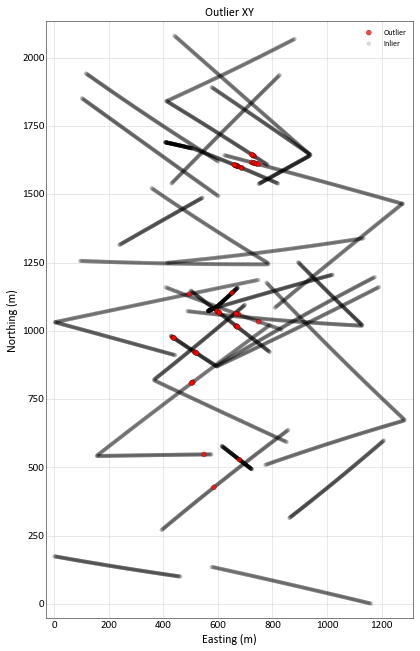

In [31]:
fig, ax = outlier.sectionplot(
    var,
    x="x",
    y="y",
    thresh=outlier.parrish_thresh,
    orient="xy",
    figsize=(6, 10),
    title="Outlier XY",
    pt_kws={"alpha": 0.15, "s": 15, "c": "k", "label": "Inlier"},
    out_kws={"alpha": 0.75, "s": 25, "ec": "k", "c": "r", "label": "Outlier"},
)
savefig(f"outlier_{example}_xy")

Saving figure outlier_ex1_yz


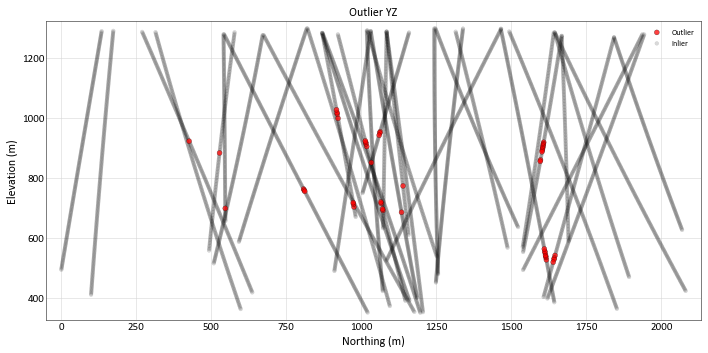

In [32]:
fig, ax = outlier.sectionplot(
    var,
    x="x",
    y="y",
    z="z",
    thresh=outlier.parrish_thresh,
    orient="yz",
    figsize=(10, 6),
    title="Outlier YZ",
    pt_kws={"alpha": 0.15, "s": 15, "c": "k", "label": "Inlier"},
    out_kws={"alpha": 0.75, "s": 25, "ec": "k", "c": "r", "label": "Outlier"},
)
savefig(f"outlier_{example}_yz")

# Cutting Curves

- Cutting curves after Roscoe (1996): "Cutting curves for grade estimation and grade control in gold mines."

Saving figure outlier_ex1_cutting_curve


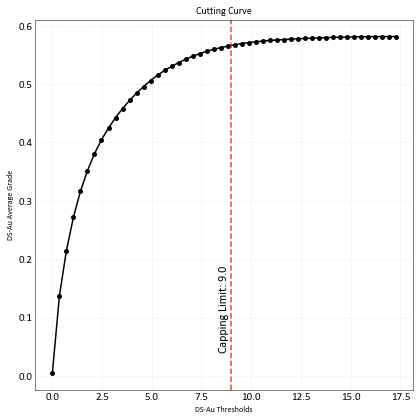

In [33]:
fig, ax = outlier.cutting_curve(
    var,
    num_thresh=50,
    plot_thresh=outlier.parrish_thresh,
    logx=False,
    figsize=(6, 6),
    marker=".",
    ms=10,
    c="k",
    title="Cutting Curve",
)
savefig(f"outlier_{example}_cutting_curve")

# Cumulative Coefficient of Variation
- Cumulative Coefficient of Variation after Parker (1991): "Statistical Treatment of Outlier Data in Epithermal Gold Deposit Reserve Estimation"
- The cumulative CV can be plotted and used to identify quantiles where there is a sudden acceleration in cumulative CV; this is where the influence of the outliers in the upper tail becomes strong.

In [34]:
ccv = outlier.cumcv(var, length)
ccv

,DS-Au,length,grade_x_length,cum_mean,cum_std,cum_cv,cum_metal
0,17.285000,5.0,86.425000,0.581213,1.473396,2.535036,0.401886
1,16.256000,5.0,81.280000,0.578955,1.460640,2.522888,0.779846
2,16.144000,5.0,80.720000,0.576836,1.449319,2.512531,1.155203
3,15.567000,5.0,77.835000,0.574732,1.438068,2.502155,1.517144
4,14.779000,5.0,73.895000,0.572705,1.427558,2.492659,1.860764
...,...,...,...,...,...,...,...
7395,0.005024,5.0,0.025119,0.005016,0.000005,0.001007,99.999534
7396,0.005017,5.0,0.025086,0.005014,0.000003,0.000633,99.999650
7397,0.005017,5.0,0.025084,0.005013,0.000003,0.000615,99.999767
7398,0.005012,5.0,0.025062,0.005012,0.000001,0.000202,99.999883


Saving figure outlier_ex1_cumcv


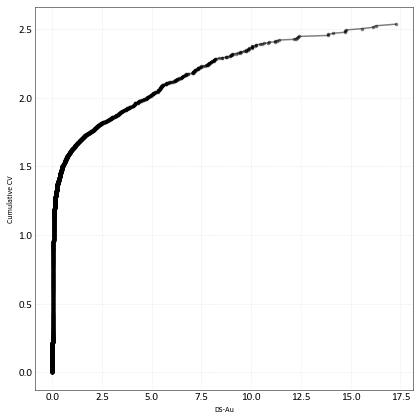

In [35]:
fig, ax = outlier.cumcv_plot(
    var, length, plot_thresh=None, figsize=(6, 6), marker=".", alpha=0.5, c="k",
)
savefig(f"outlier_{example}_cumcv")

# Mean Uncertainty

- Nowak et al. (2013): "SUGGESTIONS FOR GOOD GRADE CAPPING PRACTICES FROM HISTORICAL LITERATURE"
- Assess mean uncertainty using the spatial bootstrap
- A percentile of the data (```perc_to_cap```) can be omitted from the bootstrapping (potential capping candidates) to observe how removing data influences the expected mean versus the uncapped true mean
- The point of this exercise is an assessment of what could be an optimistic average grade in a domain if the highest ```perc_to_cap```% of the values are not used.
- If the uncapped average grade is much greater than the expected average grade after removing samples, capping may be warranted
- The variogram model for bootstrapping should be of the normal scores

In [46]:
vargstr = """2    0.1                         -nst, nugget effect
    1    0.4  45.0   0.0   0.0        -it,cc,ang1,ang2,ang3
    10.0  10.0  10.0        -a_hmax, a_hmiqiytn, a_vert
    1    0.5  45.0   0.0   0.0        -it,cc,ang1,ang2,ang3
    100.0  100.0  50.0        -a_hmax, a_hmin, a_vert"""

Saving figure outlier_ex1_mean_uncert


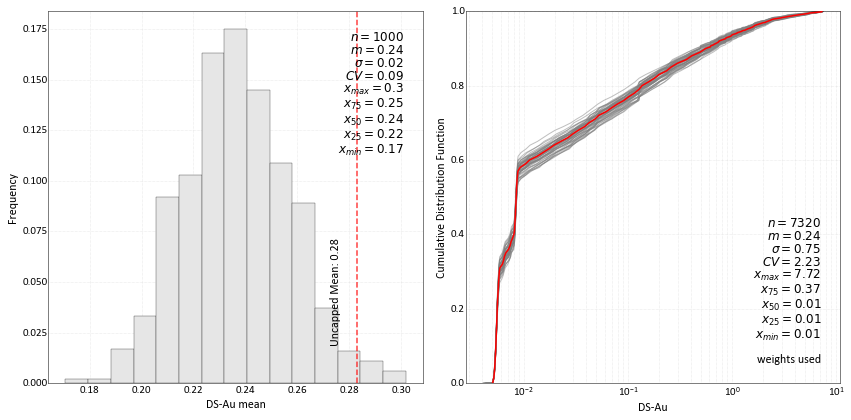

In [47]:
fig, ax = outlier.mean_uncertainty(
    var,
    wts=wts,
    vargstr=vargstr,
    perc_to_cap=0.5,
    seed=1658,
    nreals=1000,
    reals_to_plot=50,
    logx=True,
    figsize=(12, 6),
)
savefig(f"outlier_{example}_mean_uncert")

# Metal at Risk

- Metal at risk described by Parker (2006): "Technical Report of the Rock Creek Property, Nome, Alaska, USA" (pg. 17-18)
- Resample the assay distribution considering the number of assays (```nsamples```) available in a given production volume
    - typically ```nsamples``` is equal to tonnes per annual production volume / number of tonnes per assay in the domain
    - metal at risk accounts for the data density - as ```nsamples``` increases, metal at risk decreases
- Risk adjusted metal is the total metal below ```thresh``` plus P20 of the boostrapped metal above ```thresh```
- Metal at risk is the difference between the total expected metal and metal at risk 

In [38]:
risk = outlier.metal_at_risk(
    var, wts=wts, nsamples=750, thresh=10, seed=987654, nreals=1000,
)

In [39]:
risk

{'Number of Samples': 750,
 'HG Threshold': 10,
 'Expected HG Samples': 2,
 'Metal at Risk %': 10.47}

In [40]:
pd.DataFrame.from_dict(risk, orient="index").T.to_latex(
    f"./metal_at_risk_{example}.tex",
    label=f"tab:MAR_{example}",
    caption="Metal at risk for a hypothetical gold distribution.",
    index=False,
)

# Metal Removed by Capping

Saving figure outlier_ex1_metal_removed


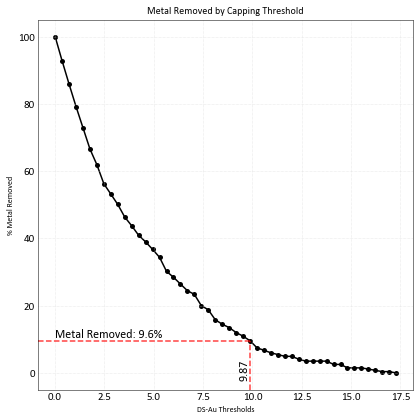

In [41]:
fig, ax = outlier.metal_removed(
    var,
    length,
    num_thresh=50,
    p=9.61,
    marker=".",
    c="k",
    ms=10,
    line_kws={"colors": "r", "linestyles": "--", "alpha": 0.75},
    title="Metal Removed by Capping Threshold",
    figsize=(6, 6),
)
savefig(f"outlier_{example}_metal_removed")

In [42]:
from cdf import cdf, percentile_from_cdf

In [43]:
df = outlier.data.copy()
cdf_x, cdfvals = cdf(df[var], weights=df[wts],)

In [44]:
nsamples = 250
pi = np.random.choice(np.random.random(nsamples), size=nsamples, replace=True)
percentile_from_cdf(cdf_x, cdfvals, pi * 100)

array([8.54727199e-03, 5.49976624e-03, 1.02201803e+01, 5.69972156e-03,
       1.32460459e+00, 4.89081407e-01, 3.04149057e-02, 1.95352675e-01,
       8.51803418e-03, 4.89081407e-01, 7.46488274e-02, 2.10967079e+00,
       5.30014887e-03, 5.21800314e-03, 2.84903727e-01, 5.49853836e-03,
       6.80976002e-03, 5.39985793e-03, 3.74610578e-01, 5.02949855e-02,
       4.22725178e-01, 2.75806344e-02, 5.48494965e-03, 7.68674113e-03,
       8.53179521e-03, 5.49853836e-03, 8.14968015e-03, 3.89155238e-02,
       1.28459314e-01, 2.84903727e-01, 2.75806344e-02, 1.32460459e+00,
       1.98800786e-01, 5.23613822e-01, 1.13334525e-01, 2.84903727e-01,
       7.27462589e-03, 1.61004472e-01, 5.63173343e-03, 5.61389136e-03,
       6.59851747e-03, 5.48955801e-03, 5.51449787e-03, 5.63641838e-03,
       8.01006223e-03, 7.53779986e-03, 1.21661835e+00, 1.93284976e-01,
       8.53179521e-03, 2.72747992e+00, 6.26867493e-03, 5.59406928e-03,
       1.04262468e-01, 8.13019901e-03, 7.90727648e-02, 9.94681826e-02,
      

In [45]:
pi

array([0.52062941, 0.15667298, 0.99856633, 0.25509095, 0.94408187,
       0.88507586, 0.66958102, 0.82158816, 0.51354481, 0.88507586,
       0.7424324 , 0.96576303, 0.05002202, 0.02500745, 0.85231771,
       0.15604334, 0.35162145, 0.0975668 , 0.87001724, 0.71144199,
       0.87697106, 0.65833539, 0.14386627, 0.38519706, 0.51827388,
       0.15604334, 0.40654508, 0.6879199 , 0.78918914, 0.85231771,
       0.65833539, 0.94408187, 0.82352237, 0.89248982, 0.77433701,
       0.85231771, 0.36197104, 0.80782247, 0.22796615, 0.2200833 ,
       0.34187277, 0.14823707, 0.16384782, 0.2290098 , 0.39069819,
       0.37579847, 0.94041048, 0.82112432, 0.51827388, 0.97548567,
       0.31896818, 0.21067035, 0.76849888, 0.40438442, 0.74642514,
       0.76468188, 0.07775508, 0.39069819, 0.75553492, 0.87727232,
       0.06176173, 0.70834466, 0.05002202, 0.1458729 , 0.21543597,
       0.82158816, 0.14386627, 0.77433701, 0.06352451, 0.37874024,
       0.37326172, 0.50786987, 0.67280793, 0.6879199 , 0.67718